In [ ]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

<Figure size 720x72 with 0 Axes>

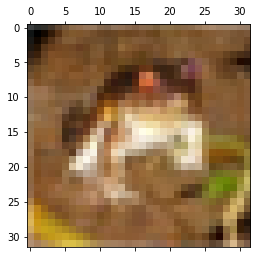

In [ ]:
plt.figure(figsize=(10,1))
plt.matshow(X_train[0])

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
classes[y_train[0][0]]

'frog'

In [ ]:
X_train_scale=X_train/255
X_test_scale=X_test/255

In [ ]:
X_train_scale

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
y_train_cat=keras.utils.to_categorical(
    y_train,num_classes=10,dtype='float32'

)

y_test_cat=keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float32'
    
)

In [ ]:
np.argmax(y_test_cat[0])

3

In [ ]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
ann=keras.Sequential(
    [
     keras.layers.Flatten(input_shape=(32,32,3)),
     keras.layers.Dense(3000,activation='relu'),
     keras.layers.Dense(1000,activation='relu'),
     keras.layers.Dense(10,activation='softmax')

    ]
)

ann.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']

)

ann.fit(X_train_scale,y_train_cat,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 101s 64ms/step - loss: 1.8123 - accuracy: 0.3562
Epoch 2/5
1563/1563 [==============================] - 101s 64ms/step - loss: 1.6262 - accuracy: 0.4254
Epoch 3/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5423 - accuracy: 0.4558
Epoch 4/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4813 - accuracy: 0.4772
Epoch 5/5
1563/1563 [==============================] - 101s 64ms/step - loss: 1.4347 - accuracy: 0.4944


In [ ]:
ann.evaluate(X_test_scale,y_test_cat)

313/313 [==============================] - 8s 24ms/step - loss: 1.4699 - accuracy: 0.4766


[1.469870924949646, 0.4765999913215637]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.65      0.53      1000
           1       0.60      0.60      0.60      1000
           2       0.49      0.15      0.24      1000
           3       0.31      0.45      0.37      1000
           4       0.62      0.15      0.24      1000
           5       0.52      0.20      0.29      1000
           6       0.51      0.49      0.50      1000
           7       0.38      0.69      0.49      1000
           8       0.64      0.57      0.60      1000
           9       0.45      0.68      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.44     10000
weighted avg       0.50      0.46      0.44     10000



# Now using CNN

In [ ]:
# convert y into 1D


y_train = y_train.reshape(-1,)
y_train.shape

y_test=y_test.reshape(-1,)
y_test[:4]

array([3, 8, 8, 0], dtype=uint8)

In [ ]:
cnn=keras.Sequential([
                      
          keras.layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
          keras.layers.MaxPool2D((2,2)),

          keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
          keras.layers.MaxPooling2D((2, 2)),
          
          keras.layers.Flatten(),
          keras.layers.Dense(100,activation='relu'),
          keras.layers.Dense(10,activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train_scale,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4552 - accuracy: 0.4787
Epoch 2/5
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1092 - accuracy: 0.6101
Epoch 3/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9752 - accuracy: 0.6606
Epoch 4/5
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8769 - accuracy: 0.6933
Epoch 5/5
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8044 - accuracy: 0.7198


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 180.9881 - accuracy: 0.5220


[180.9880828857422, 0.5220000147819519]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.83      0.57      1000
           1       0.48      0.84      0.62      1000
           2       0.72      0.23      0.35      1000
           3       0.53      0.20      0.29      1000
           4       0.82      0.12      0.20      1000
           5       0.44      0.59      0.51      1000
           6       0.88      0.40      0.55      1000
           7       0.55      0.72      0.62      1000
           8       0.61      0.60      0.60      1000
           9       0.48      0.69      0.56      1000

    accuracy                           0.52     10000
   macro avg       0.60      0.52      0.49     10000
weighted avg       0.60      0.52      0.49     10000

